# Nash Equilibrium: A Brief Introduction 

### Author: Sheekha Verma, Swaprava Nath

### Nash Equilibrium is a fundamental concept in the history of games and the most widely used method of predicting the outcome of a strategic interaction in the social sciences. 

A game comprises of:
- Players
- Actions
- Pay-off Functions

### Representing a Game and its Outcome

Games can be described by a matrix (shown below). This form of representation is known as normal form

.....................................................................................
Insert Image

### Pure Strategy Nash Equilibrium

A pure strategy nash equilibrium is an action profile with the property that no single player can obtain a higher payoff by deviating unilaterally from this profile. In other words, no other player in the game would take a different action as long as every other player remains the same. Nash equilibria are self enforcing when players are at a Nash Equilibrium, they have no desire to move because they’ll be worse off. This concept can best be understood by looking at the following example:

Elements of the game:
- Two players: N = {1,2}
- Actions: A1= {A,B}; A2 = {A,B} 
- Payoffs: 
    If the players choose different actions each get a payoff of 0. 
    If they both choose A, each get 2. 
    If they both choose B, each get 1.
......................................................................
Insert Image



Nash Equilibrium:
- The action profiles (A,A) and (B,B) are Nash Equilibrium

### Mixed Strategy Nash Equilibrium

In some cases, instead of simply choosing an action, players may be able to choose probability distributions over the set of actions available to them. Such randomization over the set of actions are referred to as Mixed strategies. Any profile of mixed strategies induces a probability distribution over action profiles in the game. Under certain assumptions a player’s preferences over all such lotteries can be represented by a function (called a von Neumann-Morgenstern utility function) that assigns a real number to each action profile. One lottery is preferred to another if and only if it results in a higher expected value of this utility function. A mixed strategy nash equilibrium is then a mixed strategy profile with property that no single player can obtain a player can obtain a higher value of expected utility by deviating unilaterally from this profile



## Algorithm for Finding All Pure and Mixed Strategy Nash Equilibrium
.........................................
Insert Image


##Libraries Needed
a) Numpy
b) Scipy
c) Sympy
d) Itertools
e) Gambit (to represent games) 

###Details about Gambit:
Gambit is a library of tools for doing computation in game theory. The python interface can be downloaded at http://sourceforge.net/projects/gambit/files/gambit13/13.1.2/

To install gambit please see the steps below:
1. Install Cython
2. Detailed steps are given at: http://gambit.sourceforge.net/gambit14/build.html

For more details please visit: http://www.gambit-project.org/gambit13/intro.html#section-downloading

Games stored in existing Gambit savefiles in either the .efg or .nfg formats can be loaded using Game.read_game()

In [ ]:
game1 = gambit.Game.read_game("e02.nfg")
#check the output for the game
game1

In [ ]:
We can either also create a game as shown below:

In [ ]:
#Adding a Prisoner's dilemma game
#=============================================================================
g_pd = gm.Game.new_table([2,2])

g_pd.title = "A prisoner's dilemma game"
g_pd.players[0].label = "P1"
g_pd.players[1].label = "P2"

#______________ Printing the game so far
#g_pd

#Adding stratgies
g_pd.players[0].strategies

g_pd.players[0].strategies[0].label = "C"
g_pd.players[0].strategies[1].label = "D"

g_pd.players[1].strategies[0].label = "C"
g_pd.players[1].strategies[1].label = "D"

#______________Printing the strategies
g_pd.players[0].strategies

#Adding the payoffs
g_pd[0,0][0] = 8 #Payoff od P1 when action by both P1 and P2 are cooperate (0)
g_pd[0,0][1] = 8

g_pd[0,1][0] = 2 #Payoff when P2 defects
g_pd[0,1][1] = 10

g_pd[1,0][0] = 10 #Payoff when P1 defects
g_pd[1,0][1] = 2

g_pd[1,1][0] = 5 #Payoff when both defects
g_pd[1,1][1] = 5

#==============================================================================

# The Nash Equilibrium Code:

In [ ]:
# Imports
import sympy as sp
import numpy as np
import scipy as sc
import itertools as it
import gambit as gm

#Reading games from an existing nfg file
#game = gm.Game.read_game("/Users/Sheekha/Documents/Python/Project-Nash-Equlibrium/nfg_files/Chicken_game")

#Reading the game created above
game = g_pd

### Step 1: Generates combination of all actions from the list of action of each player
First we generate all possible sets of actions that are possible, given the strategy set of each player. 

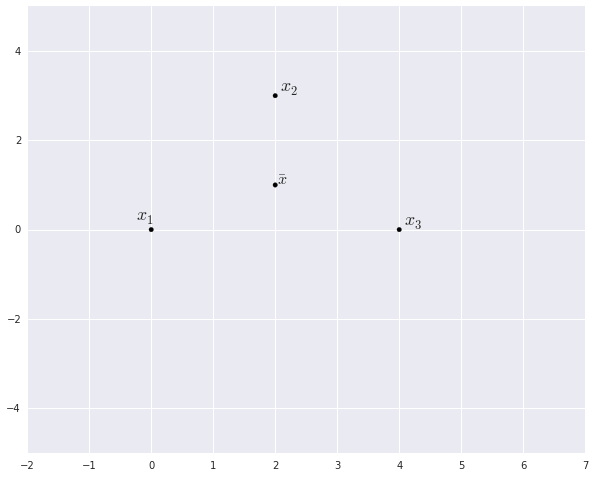

In [4]:
#Generates combination of all actions from the list of action of each player
#For example the the array "actions = [[0,1], [0,1,2]]" denotes player1's action set is [0,1] and player2's action set is [0,1,2]
#The code below generates all possible sets of (player 1 action, player 2 actions)
def generate_action_combinations(actions):
    return map(list, it.product(*actions))

#Select action combinations of all players with a particulat action for a particular player
#For example: If player 2 plays 1, then the possible action combinations for the example given above is [(0,1), (1,1)]
def generate_remaining_player_action_combination (actions, player_index, player_action):
    temp_actions = actions[:]
    final_actions = [x for x in temp_actions if x[player_index] == player_action]
    return final_actions

###Step 2: Generating support
The algorithm checks for the presence of Nash equilibrium by:
1) generating all subset of action sets which can be played. This is known as support
2) For each support generated above, we calculate the probability that players will play an action in the support
3) We then check if there is any player who will deviate from the above solution!

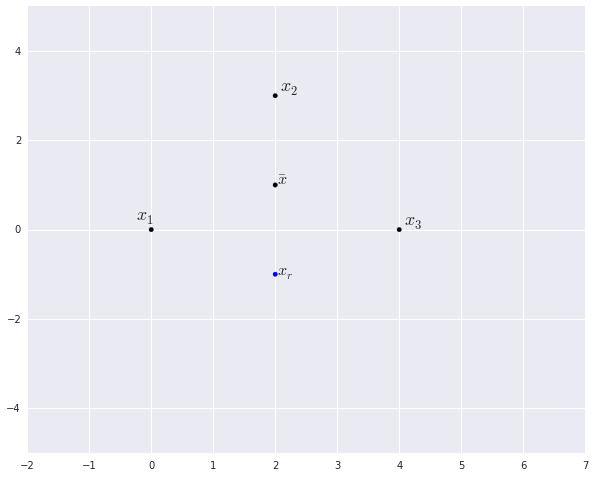

In [5]:
#Generates support for each players
def generate_support_each_player(actions):
    support = []
    for i in xrange(1, len(actions)+1):
        support += [list(x) for x in it.combinations(actions, i)]
    return support

#Generates back the set of action indices given a support i.e. list of all actions present in the support
def calculate_action_indices_from_support(support):
    transposed = zip(*support)  
    used_player_actions = [list(set(x)) for x in transposed]
    return used_player_actions

#Generates the set of actions not in the support
def get_missing_action_sets(action_sets, original_action_sets):
    unused_actions = [[] for x in players]
    used_player_actions = zip(*action_sets)
    for x in range(len(original_action_sets)):
        original_action_set = original_action_sets[x]
        used_action_set = used_player_actions[x]
        unused_actions[x] = [item for item in original_action_set if item not in used_action_set]
    return unused_actions

###Step 3: Generating payoff matrices

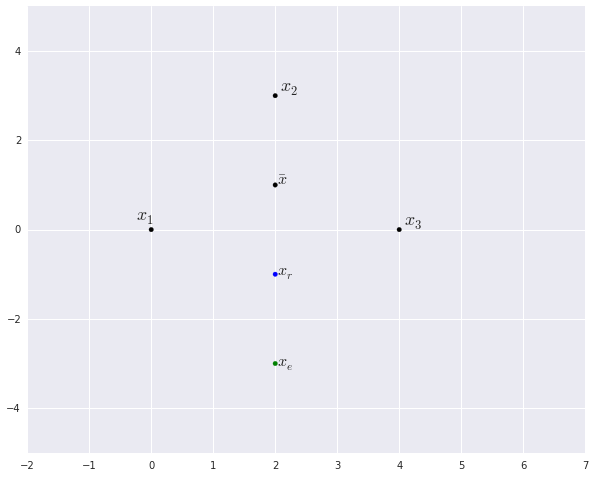

In [6]:
#generating the set of payoffs possible
def generate_payoff(game, action_set, player_index):
    return game[action_set][player_index]

#generating payoff given a support
def generate_payoffs(support, solution):
    symbols = sp.symarray('p', (players_count, max(action_counts)))
    payoffs = [0 for x in players]

    for pindex in range(players_count):
        player_action = support[0][pindex]
        player_filtered_sets = [x for x in support if x[pindex] == player_action]
        for action_set in player_filtered_sets:
            prod = 1
            for pcount in action_set:
                if pcount != pindex:
                    prod *= solution[symbols[pcount, action_set[pcount]]]
            payoffs[pindex] += game[action_set][pindex]*prod

    return payoffs

###Step 4:  Checking if the above solution is feasible

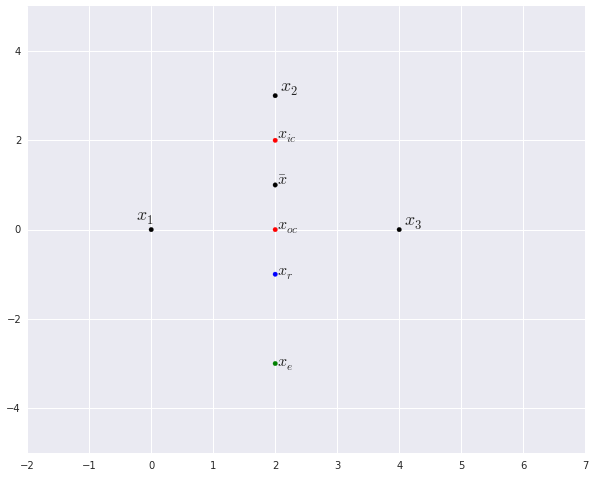

In [7]:
#First check - is the probability solution possible? Is p>=0 and p<= 1?
def checking_probability(p):
    if p<=1 and p>=0:
        return True
    else:
        return False

#Second check - will players deviate?
def check_support_payoff(payoffs, support):
    missing_actions = get_missing_action_sets(support, all_action_indices)
    for player_index in range(len(missing_actions)):
        temp_action_indices = all_action_indices[:]
        missing_action_set = missing_actions[player_index]
        if len(missing_action_set) > 0:
            temp_action_indices[player_index] = missing_action_set
            all_combinations = generate_action_combinations(temp_action_indices)
            for combination in all_combinations:
                if game[combination][player_index] > payoffs[player_index]:
                    return False
    return True


def is_solution_feasible(support, solution):
    for key in solution:
        if solution[key] < 0 or solution[key] > 1:
            return False
    payoffs = generate_payoffs(support, solution)
    return check_support_payoff(payoffs, support)

### Main code

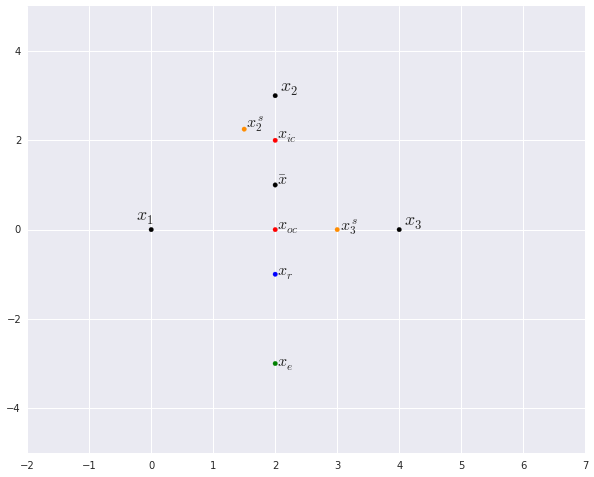

In [8]:
# Defining variables 
players = game.players
players_count = len(players) #number of players

all_action_indices = [] #action set of all players
all_action_counts = [len(game.players[i].strategies) for i in range(players_count)]
all_action_indices = [range(all_action_counts[i]) for i in range(players_count)]

#Calculating the number of variables needed
variable_count = sum(all_action_counts)


#######list of support
possible_actions_all_players= []

for player_index in range(players_count):
    possible_actions_all_players += [generate_support_each_player(all_action_indices[player_index])]


population_set = generate_action_combinations(possible_actions_all_players)


possible_support_action = []
for i in range(len(population_set)):
    if len(generate_action_combinations(population_set[i])) > 1:
        possible_support_action.append(generate_action_combinations(population_set[i]))
#print possible_support_action

support_action_count = len(possible_support_action)


for each_support in range(support_action_count):
    #===================================================================
    action_indices = calculate_action_indices_from_support(possible_support_action[each_support])
    #print action_indices

    action_counts = [len(action_indices[i]) for i in range(len(action_indices))]
    #print action_counts
    
    player_probaility_list = sp.symarray('p', (players_count, max(action_counts)))
    
    list_of_variables = []

    for iterator in xrange(players_count):
        list_of_variables += [player_probaility_list[iterator, i] for i in range(max(action_counts))]

    ###initializing the set of equations
    set_of_equations = []
    
    for player_index in range(players_count):

        generating_each_player_equations = []
    
        for player_action_index in range(action_counts[player_index]):
        
            remaining_player_action_set = generate_remaining_player_action_combination(action_indices, player_index, player_action_index)
            print remaining_player_action_set
            
            pay_off_after_randomizing = 0        
        
            for other_action_combination in range(len(remaining_player_action_set)):
            
                #for each action tuple of the other players
                current_action_set = remaining_player_action_set[other_action_combination]
                print current_action_set
                
                payoff_current_action_set = game[current_action_set][player_index]
                
            
                for counter in range(players_count):
                    if counter != player_index:
                        probability = player_probaility_list[counter, current_action_set[counter]]
                        payoff_current_action_set *= probability
                        
                pay_off_after_randomizing += payoff_current_action_set
            
            generating_each_player_equations.append(pay_off_after_randomizing)
    
        #generating equations for each player
        for i in range(action_counts[player_index] - 1):
            set_of_equations += [generating_each_player_equations[i] - generating_each_player_equations[i+1] ]
    
        #Adding the sum of probabilities to the set of equations
        set_of_equations += [sum(player_probaility_list[player_index, i] for i in range(action_counts[player_index])) - 1]

        
    solution = sp.solve(set_of_equations,list_of_variables)
    is_support_feasible = is_solution_feasible(action_indices, solution)
    
    if is_support_feasible:
        print "Found a Mixed Strategy Nash Equillibrium"
        print solution
